![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

**Import data**

In [0]:
link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
#Note: set param encoding = 'latin1'
df = pd.read_csv(link, encoding = 'latin1')

In [28]:
# Print out First 5 rows from dataframe
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [6]:
df.isna().sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
98948,False,False,False,False,False,False,False,False
340177,False,False,False,False,False,False,False,False
296731,False,False,False,False,False,False,False,False
242742,False,False,False,False,False,False,False,False
409711,False,False,False,False,False,False,False,False
367637,False,False,False,False,False,False,False,False
419071,False,False,False,False,False,False,True,False
397492,False,False,False,False,False,False,False,False
323761,False,False,False,False,False,False,False,False
474923,False,False,False,False,False,False,False,False


**Exclude negative Quatity entries**

In [0]:
quan_neg = df[df['Quantity'] < 0]
df.drop(quan_neg.index, axis = 0, inplace = True)

**Exclude negative Price entries**

In [0]:
#df[df['UnitPrice'] <= 0]

In [0]:
price_neg = df[df['UnitPrice'] < 0]
df.drop(price_neg.index, axis = 0, inplace = True)

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [39]:
# Number of orders = number of invoiceNo (1 invoiceNo = 1 order = 1 transaction)
highest_num_of_orders = df.groupby(['CustomerID', 'Country'], as_index = False).count().sort_values(by = 'InvoiceNo', ascending = False)
highest_num_of_orders[highest_num_of_orders['Country'] == 'United Kingdom'][['CustomerID', 'Country', 'InvoiceNo']].head(1)

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847


**The customer with the highest money spent on purchases comes from Netherlands**

In [40]:
df['Purchases'] = df['Quantity'] * df['UnitPrice']
highest_money_spent = df.groupby(['CustomerID', 'Country'], as_index = False).sum().sort_values(by = 'Purchases', ascending = False)
highest_money_spent = highest_money_spent[highest_money_spent['Country'] == 'Netherlands'][['CustomerID', 'Country', 'Purchases']]
highest_money_spent.head(1)

,CustomerID,Country,Purchases
1698,14646.0,Netherlands,280206.02


**On which year had the highest sales?**

In [0]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [43]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531283 entries, 0 to 541908
Data columns (total 13 columns):
InvoiceNo      531283 non-null object
StockCode      531283 non-null object
Description    530691 non-null object
Quantity       531283 non-null int64
InvoiceDate    531283 non-null datetime64[ns]
UnitPrice      531283 non-null float64
CustomerID     397924 non-null float64
Country        531283 non-null object
Purchases      531283 non-null float64
Year           531283 non-null int64
Month          531283 non-null int64
Day            531283 non-null int64
Hour           531283 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 56.7+ MB


In [45]:
highest_sales = df.groupby('Year', as_index = False).sum().sort_values(by = 'Quantity', ascending = False)
highest_sales = highest_sales[['Year', 'Quantity']]
highest_sales.head(1)

,Year,Quantity
1,2011,5298663


**How many orders (per hour)?**

In [57]:
orders_per_hour = df.groupby('Hour').count()
orders_per_hour = orders_per_hour['InvoiceNo']
orders_per_hour

Hour
6         1
7       379
8      8805
9     33755
10    47895
11    56312
12    77230
13    71075
14    66266
15    76432
16    53451
17    27635
18     7729
19     3516
20      802
Name: InvoiceNo, dtype: int64

**Make a plot about number of orders per hour**

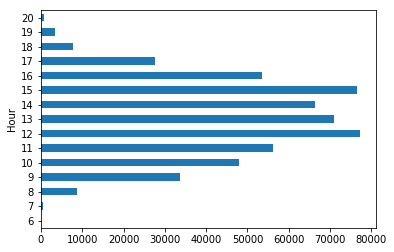

In [63]:
orders_per_hour.plot(x = 'Hour', y = 'Orders', kind = 'barh')

**How many orders (per month)?**

In [65]:
orders_per_month = df.groupby('Month').count()
orders_per_month = orders_per_month['InvoiceNo']
orders_per_month

Month
1     34350
2     27184
3     35915
4     29171
5     36292
6     36056
7     38716
8     34564
9     49323
10    59396
11    83498
12    66818
Name: InvoiceNo, dtype: int64

**Make a plot about number of orders per month**

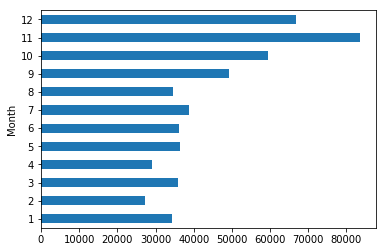

In [66]:
orders_per_month.plot(x = 'Month', y = 'Orders', kind = 'barh')

**Top 10 items most sales**

In [67]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchases,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8


In [75]:
most_sales_items = df.groupby(['StockCode', 'Description'], as_index = False).sum().sort_values(by = 'Quantity', ascending = False)
most_sales_items = most_sales_items[['StockCode', 'Description', 'Quantity']].head(10)
most_sales_items

,StockCode,Description,Quantity
2772,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2216,23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
3259,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
3768,85099B,JUMBO BAG RED RETROSPOT,48478
3791,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603
1188,22197,POPCORN HOLDER,36761
3555,84879,ASSORTED COLOUR BIRD ORNAMENT,36461
476,21212,PACK OF 72 RETROSPOT CAKE CASES,36419
2113,23084,RABBIT NIGHT LIGHT,30788
1466,22492,MINI PAINT SET VINTAGE,26633


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d63e97198>]],
      dtype=object)

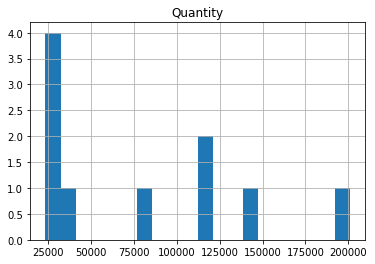

In [127]:
most_quantity_countries = df.groupby(['Country'], as_index = False).sum().sort_values(by = 'Quantity', ascending = False)
most_quantity_countries = most_quantity_countries[most_quantity_countries['Country'] != 'United Kingdom'][['Country', 'Quantity']].head(10)
most_quantity_countries.hist(bins = 20)
# What can you tell about this?

In [120]:
most_quantity_countries

,Country,Quantity
24,Netherlands,200937
10,EIRE,147447
14,Germany,119263
13,France,112104
0,Australia,84209
32,Sweden,36083
33,Switzerland,30630
31,Spain,27951
20,Japan,26016
3,Belgium,23237


### You are awesome!!